In [8]:
#A continuación importamos las librerias que utilizaremos. 
import numpy as np
import os
import matplotlib.pyplot as plt
from IPython.core.display import Image
from mpl_toolkits.mplot3d.axes3d import *
from IPython.display import display, Latex
from matplotlib import cm
from IPython.display import clear_output
#from tqdm import tqdm
from scipy import integrate
from scipy.optimize import curve_fit
import time
import math
from decimal import Decimal
from tqdm import tqdm
from matplotlib.animation import FuncAnimation 

# Taller 3: Métodos Computacionales
### Estudiantes: Andrés Hernández (201329363)    Francisco Díaz (201912252)

In [115]:
file = 'Orbitas/data/Perihelio.dat'
rawData = np.loadtxt(file, dtype = 'str')
Data = []
for i in rawData:
    Data.append([Decimal(i[0]), Decimal(i[1]), Decimal(i[2])])
        
Data = np.array(Data)

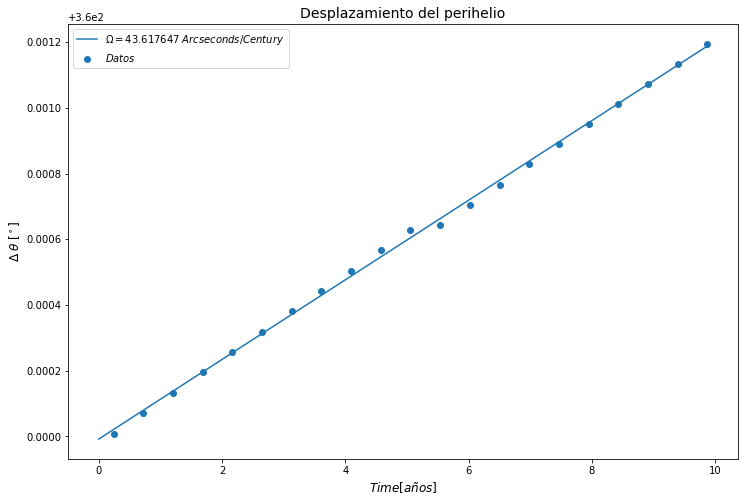

In [116]:
def f(x, m,b ):
    return m*x +b 

popt, pcov = curve_fit(f, Data[:,0]*2, Data[:,2]*2)
omega = np.around(popt[0]*(3600)*(100), 6)

t = np.linspace(0, float(np.amax(Data[:,0]*2)), 200)
y = f(t, popt[0], popt[1])

fig = plt.figure(figsize =  (12, 8))
ax = plt.axes()
ax.set_xlabel(r"$Time [años]$", size = 12)
ax.set_ylabel(r"$\Delta \; \theta \; [^\circ]$", size = 12)
ax.set_title("Desplazamiento del perihelio", size = 14)
plt.scatter(Data[:,0]*2, Data[:,2]*2, label = r"$Datos$")
plt.plot(t,y, label=r"$\Omega ="+str(omega)+" \; Arcseconds / Century$")
plt.legend(loc = 'best')

## 3. Tensor de Inercia de una estrella naciente

Para un sistema de $N$ partículas con masa $m_k$ y posiciones $r_k$, el tensor de inercia se define como:
$$
I = \sum_{k=1}^{N}m_{k}((r_{k} \cdot r_{k} ) E - r_{k}\otimes r_{k} ) 
$$

**a)** Muestre que el tensor de inercia para esta estrella está dado por:

$$
 I = \begin{pmatrix}
 1.1163 \times 10 ^{4} &  2.0524 \times 10^{0}  & 7.4286 \times 10^{-1}  \\ 
 2.0524 \times 10^{0} & 8.9520 \times 10^3 &  −2.3483 \times 10^3  \\ 
7.4286 \times 10^{-1}    & −2.3483 \times 10^3 & 4.2341 \times 10^3 
\end{pmatrix}
$$


In [2]:
#Primero importamos los datos del archivo CuerposCelestes.dat
file_ = 'data/CuerposCelestes.dat'
r = np.loadtxt(file_, comments='#')
X = r[:,0]
Y = r[:,1]
Z = r[:,2]

In [3]:
def KroneckerProd(v,w):
    MProd = np.ones((len(v), len(w)))
    for i in range(len(v)):
        for j in range(len(w)):
            MProd[i,j] = v[i]*w[j]
    return MProd

def InerciaTensor(m , r):
    E = np.identity(len(r[0]))
    I = np.zeros((len(r[0]), len(r[0])))
    for k in range(len(m)):
        I += m[k]* ((np.dot(r[k], r[k].T)*E)-KroneckerProd(r[k], r[k]))
    return I

M = np.ones(len(r))
I = InerciaTensor(M , r)
print(I)

[[ 1.11638178e+04  2.05248547e+00  7.42865762e-01]
 [ 2.05248547e+00  8.95207032e+03 -2.34834623e+03]
 [ 7.42865762e-01 -2.34834623e+03  4.23411270e+03]]


**b)** Encuentre los auto-valores y auto-vectores. Si dos valores propios son cercanos o iguales ¿Qué interpretación tienen los auto-valores respecto a las simetrías de este sistema?

In [4]:
eigenValues, eigenVectors = np.linalg.eig(I)
for i in range(len(eigenValues)):
    display(Latex(r'$\lambda_{'+str(i+1)+ '} = '+ str(eigenValues[i])+' $'))
for i in range(len(eigenValues)):
    display(Latex(r'$v_{'+str(i+1)+ '} = ('+str(eigenVectors[i][0])+', \; \; \;' +str(eigenVectors[i][1])+',\; \; \;' +str(eigenVectors[i][2])+')$ '))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

**c)** Haga una gráfica en 3D de las estrella, los eigenvectores de la estrella y la estrella sobre sus ejes principales.

Primero calculamos la matriz de rotación $T$ asociada la transformación de cambio de base entre $B = \{v_{1}, v_{2}, v_{3} \}$ y $B' =  \{ e_{1}, e_{2}, e_{3} \}$ donde $B$ es la base correspondiente a los ejes principales del cuerpo (eigenvectores ya calculados) y $B'$ es la base canónica. Por definición, esta matríz está dada por:
$$
 T = \begin{pmatrix}
e_{1} \cdot v_{1} & e_{1} \cdot v_{2} & e_{1} \cdot v_{3} \\ 
e_{2} \cdot v_{1} & e_{2} \cdot v_{2} & e_{2} \cdot v_{3} \\ 
e_{3} \cdot v_{1} & e_{3} \cdot v_{2} & e_{3} \cdot v_{3}
\end{pmatrix}
$$


In [5]:
Base1 = [[1, 0, 0], [0, 1, 0],  [0, 0 , 1]]
T = np.zeros((3,3))
for i in range(len(T)):
    for j in range(len(T)):
        T[i,j] = np.dot(eigenVectors[j], Base1[i])
print(T)

[[ 9.99999139e-01  1.27176354e-03 -3.23776435e-04]
 [ 1.29907114e-03 -9.24310243e-01  3.81639736e-01]
 [-1.86085626e-04  3.81639828e-01  9.24311099e-01]]


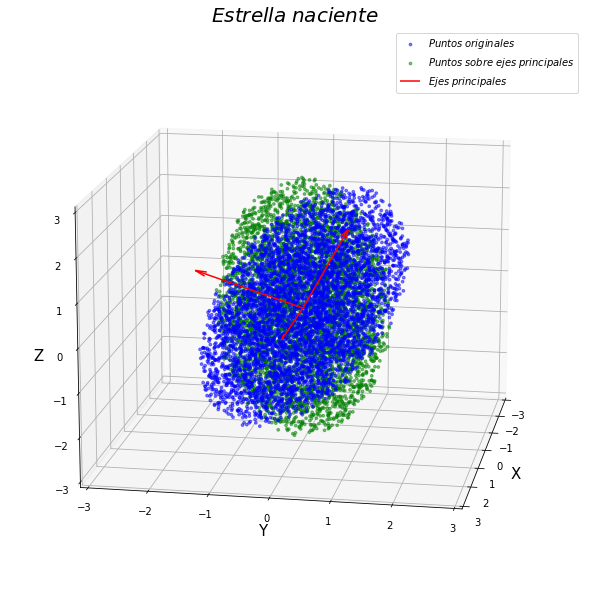

In [6]:
rNewAxes = np.dot(T, r.T)

soa = np.array([[0, 0, 0, eigenVectors[0][0], eigenVectors[0][1],eigenVectors[0][2]], 
                [0, 0, 0, eigenVectors[1][0], eigenVectors[1][1],eigenVectors[1][2]],
                [0, 0, 0, eigenVectors[2][0], eigenVectors[2][1],eigenVectors[2][2]],])

O1, O2, O3 , U, V, W = zip(*soa)
fs = 15

fig = plt.figure( figsize = (10, 8))
ax = Axes3D(fig, elev = 15, azim = 10)
ax.scatter(X, Y, Z, color = 'b', marker='.', s = 30, alpha = 0.5, label=r'$Puntos\; originales$')
ax.scatter(rNewAxes[0], rNewAxes[1], rNewAxes[2], color = 'g', marker='.', s = 30, alpha = 0.5, label=r'$Puntos \; sobre \;ejes \;principales$')
ax.quiver(O1, O2, O3, U, V, W, color = 'r', pivot='tail',length= 2,arrow_length_ratio=0.1, label = r'$Ejes \;principales$')
ax.set_title(r'$Estrella \; naciente$', fontsize = fs+5)
ax.set_xlabel('X', fontsize = fs)
ax.set_ylabel('Y', fontsize = fs)
ax.set_zlabel('Z', fontsize = fs)
ax.set_xlim(-3.,3.)
ax.set_ylim(-3.,3.)
ax.set_zlim(-3.,3.)
ax.legend(loc='best')
plt.show()

## 4. Series de Fourier
**Aplicación numérica**: Usar la serie de Fourier de $f(t) = t^2$ en el intervalo $ −π \leq  t \leq π$ y $f(t+ 2\pi ) = f(t)$. Para estimar numéricamente (Usando Python y la identidad de Parseval) la suma:
$$
\sum_{n = 1}^{\infty} \frac{1}{n^6} = \frac{\pi ^6}{945}
$$

Analíticamente encontramos que la expansión en series de Fourirer de la función $f(t)$ está dada por:
$$
f(t) = \frac{\pi^{2}}{3} +\sum_{n = 1}^{\infty} \frac{4}{n^2}(-1)^n \cos(nx)
$$

Por otro lado, si estudiamos la serie de Fourirer de la función $h(t)= t^3$ encontramos analíticamente que:
$$
h(t) =\sum_{n = 1}^{\infty} (-1) ^n \left [ \frac{12}{n^3} - \frac{2 \pi ^2 }{n} \right ] \sin(nx)
$$
Así, utilizando la identidad de Parseval para esta serie de Fourier encontramos que: 
\begin{align*}
\frac{2}{T} \int_{-T/2}^{T/2} |h(t)|^2 dt &= \frac{a_{0}^{2}}{2} + \sum_{n = 1}^{\infty} (a_{n} ^{2} + b_{n}^{2}) \\
\frac{1}{\pi} \int_{-\pi}^{\pi} t^6 dt &= \sum_{n = 1}^{\infty} b_{n}^{2} \\
\frac{2}{7}\pi^6 &= \sum_{n = 1}^{\infty} b_{n}^{2} \\
\therefore \frac{\pi^6}{945} &= \frac{7}{2 \cdot 945}\sum_{n = 1}^{\infty} b_{n}^{2} 
\end{align*}

In [75]:
def GetFourier(f_, t, T, N):
    
    y = t
    a0, error0 = integrate.quad( lambda t: f_(t), -0.5*T, 0.5*T )
    a0 *= 2/T
    
    Coeff = [[a0,0]]
    y = a0/2
    
    for n in tqdm(range(1, N)):
        an, erroran = integrate.quad( lambda t: f_(t)*np.cos( (2*np.pi*n*t)/T ), -0.5*T, 0.5*T)
        bn, errorbn = integrate.quad( lambda t: f_(t)*np.sin( (2*np.pi*n*t)/T ), -0.5*T, 0.5*T)
        
        Coeff.append([an*2/T,bn*2/T])
        
        y += 2*an*np.cos( (2*np.pi*n*t)/T )/T + 2*bn*np.sin( (2*np.pi*n*t)/T )/T 

    return y, Coeff

def GetParseval1(Coeff_):
    
    sum = ((Coeff_[0][0]*2)**2)/2
    

    for i in range(1, len(Coeff_)):
        
        sum+= (Coeff_[i][0]**2) + (Coeff_[i][1]**2) 
    
    return sum

def GetParseval2(f_, T_):
    
    return (2/T)*integrate.quad( lambda t: np.abs(f_(t))**2, -0.5*T_, 0.5*T_)[0]

def f(x):
    return x**3

NCoeff, T = 100, 2*np.pi
Value, Coeffs = GetFourier(f, np.pi,T,NCoeff)

print(GetParseval1(Coeffs)*(7/2)*(1/945), (np.pi**6)/945)

 64%|██████▎   | 63/99 [00:00<00:00, 318.37it/s]<ipython-input-75-bb18677f20da>:12: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  bn, errorbn = integrate.quad( lambda t: f_(t)*np.sin( (2*np.pi*n*t)/T ), -0.5*T, 0.5*T)
100%|██████████| 99/99 [00:00<00:00, 185.84it/s]

1.0028402838272301 1.017343061984449


## 5. Transformada de Fourier
**1.** Descargue los datos de las manchas solares desde 1600. https://github.com/asegura4488/MetodosCompu2021/blob/main/Week10/data/ManchasSolares.dat. La columna 1 es el año, la segunda es el mes y la tercera es el número de manchas. Encuentre el periodo de manchas solares desde el año 1900.


In [198]:
file = 'data/ManchasSolares.dat'
rawData = np.loadtxt(file, dtype='float')
Data = []
for i in rawData:
    if i[0] >= 1900:
        Data.append(np.array(i))
        
Data = np.array(Data)

ManchasTotales = Data[:,3]
TiempoTotal = Data[:,0]+(Data[:,1]-1.0)/12.0

NManchas = ManchasTotales[ManchasTotales>0]
Tiempo = TiempoTotal[TiempoTotal>0] 

In [204]:
N = len(NManchas)
fftManchas = np.fft.fft(NManchas)
fftManchas = fftManchas*2/N

frecuencias = np.fft.fftfreq(N)
print(fftManchas)
print(frecuencias)

[124.5769569 +2.00601775e-15j  -8.1365201 +1.56436216e+01j
   4.4170166 +6.61701560e+00j ...  -6.37807103-1.03992163e+01j
   4.4170166 -6.61701560e+00j  -8.1365201 -1.56436216e+01j]
[ 0.          0.00087951  0.00175901 ... -0.00263852 -0.00175901
 -0.00087951]


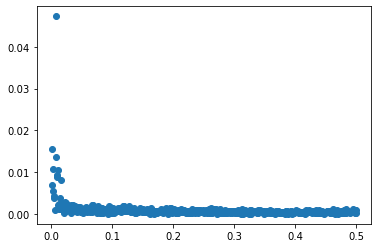

In [205]:
# Idea de filtrado
mask = frecuencias > 0. # Tomar positivas
plt.scatter(frecuencias[mask], np.abs(fftManchas[mask])/N)

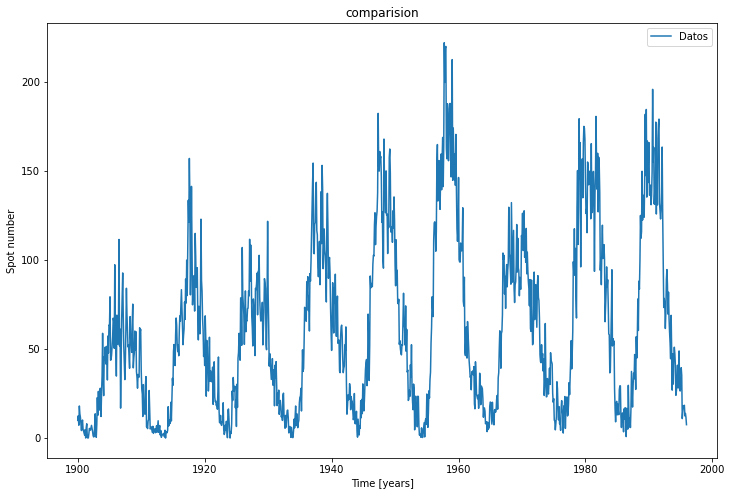

In [189]:


def func(x, a, b, c, d):
	return a * np.sin(b*x+c)+d
popt, pcov = curve_fit(func, Tiempo, NManchas)



fig = plt.figure(figsize =  (12, 8))
ax = plt.axes()

ax.set_xlabel("Time [years]")
ax.set_ylabel("Spot number")
ax.set_title("comparision")

plt.plot(Tiempo, NManchas, label="Datos")

x = np.linspace(np.amin(Tiempo), np.amax(Tiempo), 200)
y = func(x, popt[0], popt[1], popt[2], popt[3])
#plt.plot(x,y, label="Fit!")

ax.legend()

plt.show()

## 7. Redes Neuronales
**1.** Modifique el código sobre redes neuronales escrito en C++ para entrenar una red neuronal sencilla. La red neuronal debe comportarse como una compuerta XNOR.La red debe tener la topología más simple posible (un par de neuronas en un capa o dos neuronas endos capas) y entrenada usando solo n´umeros aleatorios.

In [7]:
sigm = ( lambda x: 1/(1+np.exp(-x)),
         lambda x: x*(1-x) )
relu = ( lambda x: np.maximum(0., x),
         lambda x: np.piecewise(x, [x < 0., x >=0.], [0.,1.]))
class Layer():
    
    def __init__(self, NConnections, NNeurons, ActivationFunc):
        
        self.ActivationFunc = ActivationFunc
        
        # Inicializamos pesos y bias
        
        self.b = np.random.rand(1,NNeurons)*2-1
        self.W = np.random.rand(NConnections,NNeurons)*2 -1.
        
def Perceptron(Topology, ActivationFunc):
    
    NN = []
    
    for l, layer in enumerate(Topology[:-1]):
        
        NN.append(Layer(Topology[l],Topology[l+1],ActivationFunc[l+1]))
        
    return NN



In [13]:
Cost = (lambda Yp, Yr: np.mean((Yp-Yr)**2),
        lambda Yp, Yr: Yp-Yr)
def Predict(Perceptron, XTrain, train=True):
    
    # Guardamos la suma ponderada de cada capa y sus activaciones
    out = [(None,XTrain)]
    
    # Forward Pass
    for l, layer in enumerate(Perceptron):
        
        z = np.dot(out[-1][1],Perceptron[l].W+Perceptron[l].b)
        a = Perceptron[l].ActivationFunc[0](z)
        
        out.append((z,a))
        
    if train:
        return out
    else:
        return out[-1][1]

In [10]:
def Train(Perceptron,XTrain,YTrain,Cost,gamma):
    
    delta = []
    
    # Forward Pass
    out = Predict(Perceptron,XTrain)
    
    # Recordar que la primera capa no esta en out
    # usar l+1 si arranca en cero
    
    # For loop hacia atras
    # Backward pass
    for l in reversed(range(0,len(Perceptron))):
        
        z = out[l+1][0] # Salidas hacia atras de las sumas
        a = out[l+1][1] # Salidas hacia atras de las activaciones
        
        # Error en la ultima capa
        if l == len(Perceptron) -1:
            # Derivada del Costo en a
            # Derivada de la activacion en a
            delta.insert(0,Cost[1](a,YTrain)*Perceptron[l].ActivationFunc[1](a))
        else:
            delta.insert(0, np.dot(delta[0],Wt.T)*Perceptron[l].ActivationFunc[1](a))
        
        Wt = Perceptron[l].W
        
        # Gradient Descent
        Perceptron[l].b -= gamma*np.mean(delta[0], axis=0, keepdims=True)
        Perceptron[l].W -= gamma*np.dot(out[l][1].T,delta[0])
         
    # Retornamos la rediccion de la ultima capa        
    return out[-1][1]

In [11]:
LoosF = []
LoosFT = []

def GetFig(Max):
    
    fig = plt.figure(figsize=(4,8))
    ax = fig.add_subplot(2,1,1)
    
    resolucion = 50
    
    x = np.linspace(-1.5,1.5,resolucion)
    y = np.linspace(-1.5,1.5,resolucion) 
    
    Y = np.zeros((resolucion,resolucion))
    
    for i,_x in enumerate(x):
        for j,_y in enumerate(y):
            Y[i,j] = Predict(Perceptron1, np.array([[_x,_y]]),False)


    ax.plot(range(len(LoosF)),LoosF,label='Training')
    ax.plot(range(len(LoosFT)),LoosFT,label='Testing')
    ax.legend(loc=0)
    
    clear_output(wait=True)
    plt.show()
    time.sleep(0.01)

In [18]:
Epochs = int(1e5)
XTrain = np.array([[1,1],[1,0],[0,1],[0,0]])
YTrain = np.array([[1.],[0.],[0.],[1]])

MyTopology = [2,2, 1]

Activations = [sigm, sigm, sigm]

Perceptron1 = Perceptron(MyTopology, Activations)
print(Perceptron1)
for e in range(Epochs):
    
    Yp = Train(Perceptron1,XTrain,YTrain,Cost,0.01)
    YpT = Predict(Perceptron1, XTrain, False) 
    
    if e % 1000 == 0:
        LoosF.append(Cost[0](Yp,YTrain))
        LoosFT.append(Cost[0](YpT,YTrain))
        
        GetFig(LoosF[0])


KeyboardInterrupt: 

In [17]:
print(Predict(Perceptron1, XTrain, False) )

[[0.40207877]
 [0.31200181]
 [0.30418465]
 [0.87689013]]


In [ ]:
# import Python Libraries
import numpy as np
from matplotlib import pyplot as plt
  
# Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
  
# Initialization of the neural network parameters
# Initialized all the weights in the range of between 0 and 1
# Bias values are initialized to 0
def initializeParameters(inputFeatures, neuronsInHiddenLayers, outputFeatures):
    W1 = np.random.randn(neuronsInHiddenLayers, inputFeatures)
    W2 = np.random.randn(outputFeatures, neuronsInHiddenLayers)
    b1 = np.zeros((neuronsInHiddenLayers, 1))
    b2 = np.zeros((outputFeatures, 1))
      
    parameters = {"W1" : W1, "b1": b1,
                  "W2" : W2, "b2": b2}
    return parameters
  
# Forward Propagation
def forwardPropagation(X, Y, parameters):
    m = X.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]
  
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
  
    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2)
    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), (1 - Y))
    cost = -np.sum(logprobs) / m
    return cost, cache, A2
  
# Backward Propagation
def backwardPropagation(X, Y, cache):
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2) = cache
      
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis = 1, keepdims = True)
      
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, A1 * (1- A1))
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis = 1, keepdims = True) / m
      
    gradients = {"dZ2": dZ2, "dW2": dW2, "db2": db2,
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}
    return gradients
  
# Updating the weights based on the negative gradients
def updateParameters(parameters, gradients, learningRate):
    parameters["W1"] = parameters["W1"] - learningRate * gradients["dW1"]
    parameters["W2"] = parameters["W2"] - learningRate * gradients["dW2"]
    parameters["b1"] = parameters["b1"] - learningRate * gradients["db1"]
    parameters["b2"] = parameters["b2"] - learningRate * gradients["db2"]
    return parameters
  
# Model to learn the XNOR truth table 
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]]) # XNOR input
Y = np.array([[1, 0, 0, 1]]) # XNOR output
  
# Define model parameters
neuronsInHiddenLayers = 2 # number of hidden layer neurons (2)
inputFeatures = X.shape[0] # number of input features (2)
outputFeatures = Y.shape[0] # number of output features (1)
parameters = initializeParameters(inputFeatures, neuronsInHiddenLayers, outputFeatures)
epoch = 100000
learningRate = 0.01
losses = np.zeros((epoch, 1))
  
for i in range(epoch):
    losses[i, 0], cache, A2 = forwardPropagation(X, Y, parameters)
    gradients = backwardPropagation(X, Y, cache)
    parameters = updateParameters(parameters, gradients, learningRate)

plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()
  
# Testing
X = np.array([[1, 1, 0, 0], [0, 1, 0, 1]]) # XNOR input
cost, _, A2 = forwardPropagation(X, Y, parameters)
prediction = (A2 > 0.5) * 1.0
# print(A2)
print(prediction)